# Chapter 2 - Distributions
### 2.1 - Histograms
- Dictionaries are an efficient way to compute frequencies
- Questions to ask about histograms
    - Central tendency - do they cluster around a particular point?
    - Modes - is there more than one cluster?
    - Spread - how much variability is there in the values?
    - Tails - how quickly do the probabilities drop off as we move away from the modes?
    - Outliers - are there extreme values far from the modes?
*Summary statistics* intended to answer these questions
    - Mean
    - Variance
    - Standard deviation
    - Effect size - compares difference between groups to the variability between groups (Cohen's d)

In [4]:
# Prep for analysis
import os
os.chdir('C:\\Users\\susie\\Documents\\MSc\\1. Background\\ThinkStats2\\code')

import nsfg
preg = nsfg.ReadFemPreg()
display(preg.head())

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [47]:
### Exercise 2.1
# Filter for live births
preg_livebirths = preg[preg.outcome == 1]

# Create a subset of data for first pregnancies and non-first pregnancies (other)
preg_first = preg_livebirths[preg_livebirths.birthord == 1]
preg_other = preg_livebirths[preg_livebirths.birthord != 1]

# Check for outliers
#display(preg_first.prglngth.value_counts().sort_index())
#display(preg_other.prglngth.value_counts().sort_index())

# Calculate means
first_lngth_mean = preg_first.prglngth.mean()
other_lngth_mean = preg_other.prglngth.mean()
mean = "Mean"

# Calculate medians
first_lngth_median = preg_first.prglngth.median()
other_lngth_median = preg_other.prglngth.median()
median = "Median"

# Calculate variance
first_lngth_var = preg_first.prglngth.var()
other_lngth_var = preg_other.prglngth.var()
var = "Variance"

# Calculate std
first_lngth_std = preg_first.prglngth.std()
other_lngth_std = preg_other.prglngth.std()
std = "Standard deviation"

# Calculate summary statistics for first pregnancies vs. others
def generate_summary_stat(stat, first, other):
        text = "{stat_label} pregnancy duration for first babies is {first_stat} weeks and {other_stat} weeks for other pregnancies"
        return text.format(stat_label = stat, first_stat = round(first,2), other_stat = round(other,2))

display(generate_summary_stat(mean, first_lngth_mean, other_lngth_mean))
display(generate_summary_stat(median, first_lngth_median, other_lngth_median))
display(generate_summary_stat(var, first_lngth_var, other_lngth_var))
display(generate_summary_stat(std, first_lngth_std, other_lngth_std))

# Calculate effect size
diff_in_means = first_lngth_mean - other_lngth_mean
n_first, n_other = len(preg_first), len(preg_other)
weighted_var = (n_first * first_lngth_var + n_other * other_lngth_var) / (n_first + n_other)
d = diff_in_means / (weighted_var ** 0.5)

display("Difference in mean duration is {}".format(round(diff_in_means, 2)))
display("Weighted effect size is {}%".format(round(d * 100, 2)))

'Mean pregnancy duration for first babies is 38.6 weeks and 38.52 weeks for other pregnancies'

'Median pregnancy duration for first babies is 39.0 weeks and 39.0 weeks for other pregnancies'

'Variance pregnancy duration for first babies is 7.79 weeks and 6.84 weeks for other pregnancies'

'Standard deviation pregnancy duration for first babies is 2.79 weeks and 2.62 weeks for other pregnancies'

'Difference in mean duration is 0.08'

'Weighted effect size is 2.89%'

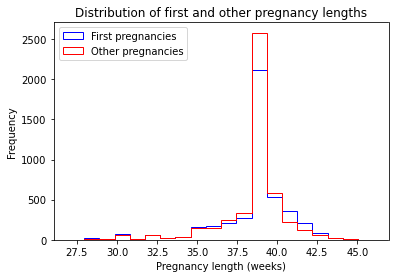

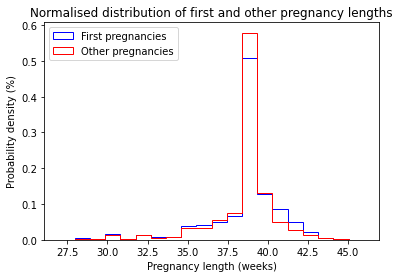

In [50]:
### Exercise 2.1
# Distributions

# Import packages
%matplotlib inline


# Distribution of first and other pregnancy lengths
plt.hist(preg_first['prglngth'], bins = 20, range = (27, 46), color = 'blue', 
         histtype = 'step', label = 'First pregnancies')
plt.hist(preg_other['prglngth'], bins = 20, range = (27, 46), color = 'red', 
         histtype = 'step', label = 'Other pregnancies')
plt.legend(loc = 'upper left')
plt.title("Distribution of first and other pregnancy lengths")
plt.xlabel("Pregnancy length (weeks)")
plt.ylabel("Frequency")
plt.show()

# Normalised distribution of first and other pregnancy lengths
plt.hist(preg_first['prglngth'], bins = 20, range = (27, 46), color = 'blue', 
         histtype = 'step', density = True, label = 'First pregnancies')
plt.hist(preg_other['prglngth'], bins = 20, range = (27, 46), color = 'red', 
         histtype = 'step', density = True, label = 'Other pregnancies')
plt.legend(loc = 'upper left')
plt.title("Normalised distribution of first and other pregnancy lengths")
plt.xlabel("Pregnancy length (weeks)")
plt.ylabel("Probability density (%)")
plt.show()

### Exercise 2.1
Overall, there is limited evidence to support the hypothesis that first babies arrive late. Whilst the mean pregnancy duration for first babies is just under a week longer than for other babies (38.6 vs. 38.5 weeks), first babies also see a higher variance in pregnancy lengths (7.8 weeks vs. 6.8 weeks). When controlling for variance of the two sub-groups, the effect size is reduced to around 2.9%.

A visual review of distributions supports a similar set of conclusions - the histograms above show that pregnancy lengths are clustered around 38 weeks for both first and other babies. It is also possible to see that, in a normalised distribution, a lower proportion of first babies are born at 38 weeks, with the distribution of pregnancy lengths for first babies distributed more widely across pregnancy lengths. The distribution is negatively skewed (for both first and other babies), with a longer tail of babies born before 38 weeks. As a result, it is not possible to positively conclude that first babies arrive late.